<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [18]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [19]:
## Write your code here
def missing_value(df):
    return df.isnull().sum().to_frame('missing_values')

missing_data=missing_value(df)
missing_data

,missing_values
ResponseId,0
MainBranch,0
Age,0
Employment,0
RemoteWork,10631
...,...
JobSatPoints_11,35992
SurveyLength,9255
SurveyEase,9199
ConvertedCompYearly,42002


In [43]:
df.drop('ResponseId',axis=1,inplace=True,errors='ignore')
print('There are', df.duplicated().sum(), 'duplicate rows.')

There are 349 duplicate rows.


In [44]:
## Write your code here
df.drop_duplicates(inplace=True)

In [20]:
mean_jobSAT = df['JobSat'].mean()

df['JobSat'].fillna(mean_jobSAT,inplace=True)


In [21]:
df['CodingActivities'] = df['CodingActivities'].ffill()

In [22]:
df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].value_counts().idxmax())

In [23]:
df['Employment'].fillna(df['Employment'].value_counts().idxmax(),inplace=True)

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [24]:
df['YearsCodePro'].fillna(df['YearsCodePro'].value_counts().idxmax(),inplace=True)

In [29]:
df['YearsCodePro'].replace({'Less than 1 year':0.5,'More than 50 years':55}, inplace=True)

In [34]:
df['YearsCodePro'].value_counts()

YearsCodePro
2      17995
3       4093
5       3526
10      3251
4       3215
0.5     2856
6       2843
1       2639
8       2549
7       2517
12      1777
15      1635
20      1549
9       1493
11      1312
13      1127
14      1082
25       998
16       946
18       867
17       814
30       689
24       632
19       516
22       492
23       448
26       426
27       380
21       380
28       342
35       285
29       196
32       194
40       194
34       169
38       134
33       132
36       119
31       106
37       104
45        56
42        55
39        54
41        51
55        50
44        42
43        37
46        21
50        14
48        14
49        11
47        10
Name: count, dtype: int64

In [35]:
missing_data=missing_value(df)
missing_data.loc[['YearsCodePro','JobSat'],]

,missing_values
YearsCodePro,0
JobSat,0


C:\Users\gebre\AppData\Local\Temp\ipykernel_13800\1550151166.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_sat = df.groupby('ExperienceRange')['JobSat'].median()


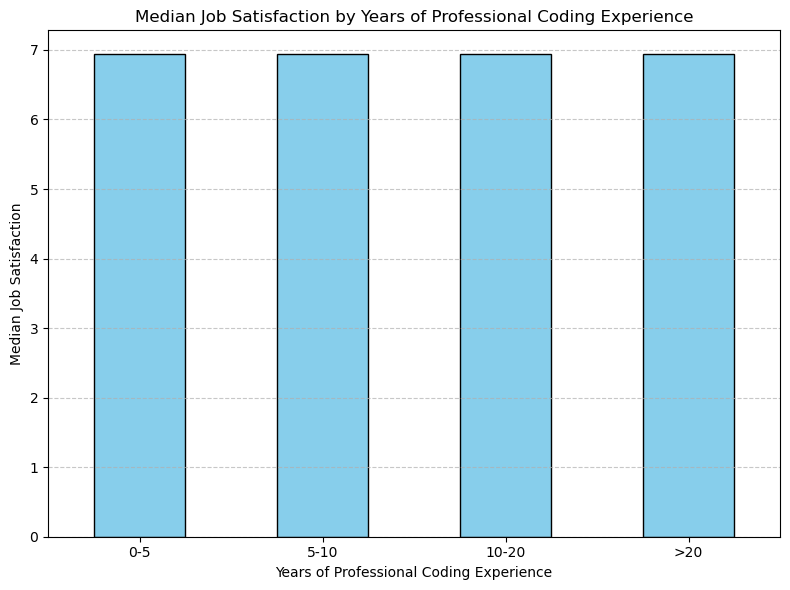

In [ ]:
## Write your code here

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Define experience ranges
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Calculate median JobSat for each range
median_job_sat = df.groupby('ExperienceRange')['JobSat'].median()

# Plotting
plt.figure(figsize=(8, 6))
median_job_sat.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


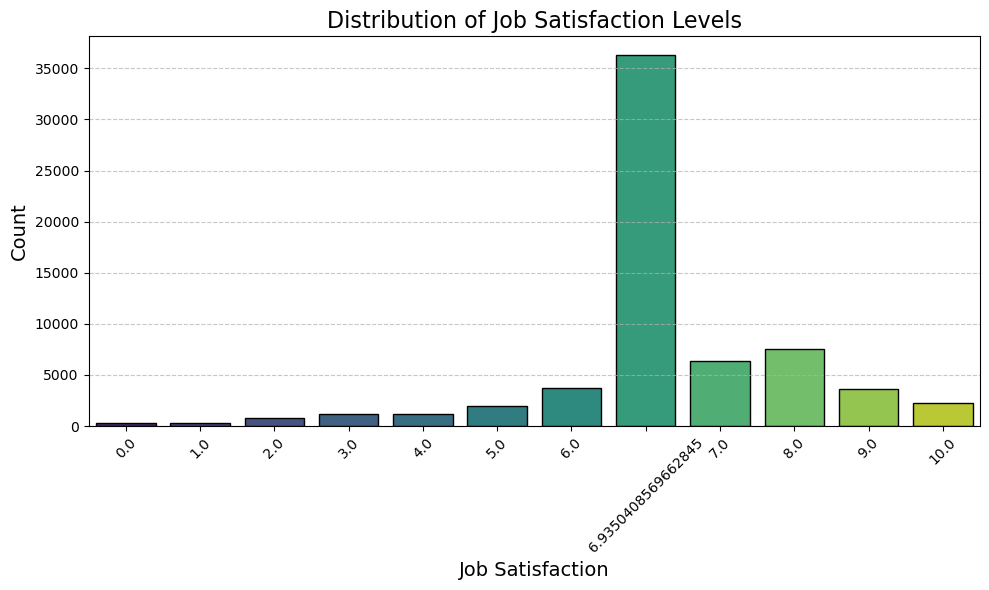

In [40]:
## Write your code here

# Clean 'JobSat' column if needed
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')  # Ensure numeric, invalid parsing will be NaN

# Drop NaN values in 'JobSat' for the plot
df_cleaned = df.dropna(subset=['JobSat'])

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='JobSat', palette='viridis', edgecolor='black')

# Customize the plot
plt.title('Distribution of Job Satisfaction Levels', fontsize=16)
plt.xlabel('Job Satisfaction', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


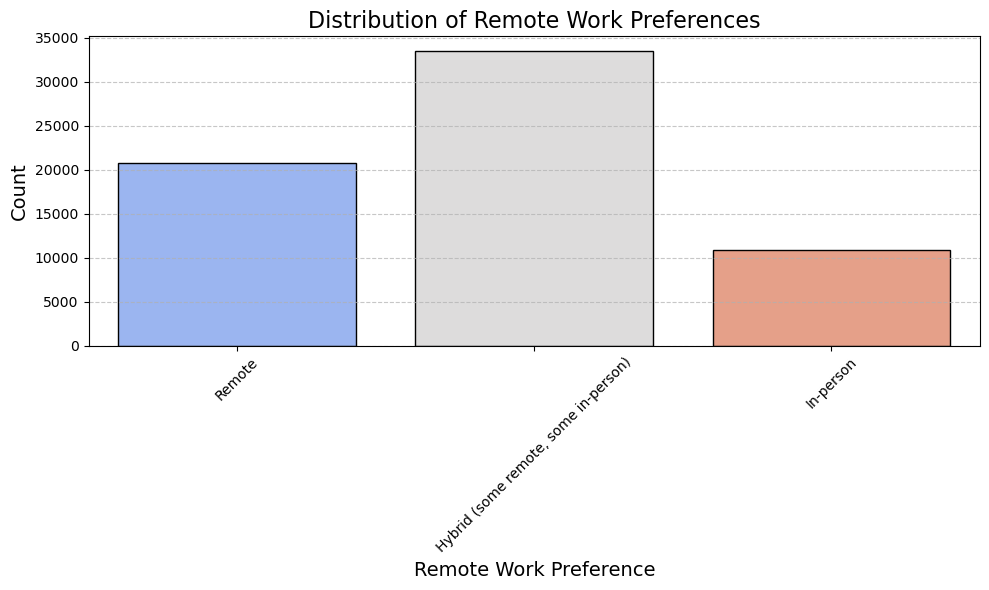

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                            44.335141   
Employed, full-time;Employed, part-time                                        40.094340   
Employed, full-time;Independent contractor, fre...                             37.331081   
Employed, full-time;Independent contractor, fre...                             43.478261   
Employed, full-time;Independent contractor, fre...                              0.000000   
Employed, full-time;Independent contractor, fre...                              0.000000   
Employed, full-time;Independent contractor, fre...                              0.000000   
Employed, full-time;Independent contractor, fre...                              0.000000   
Employed, full-time;Independent contractor, fre...                              

In [45]:
## Write your code here

# Ensure columns are strings for consistent handling
df['RemoteWork'] = df['RemoteWork'].astype(str)
df['Employment'] = df['Employment'].astype(str)

### 1. Count Plot for RemoteWork Distribution ###
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RemoteWork', palette='coolwarm', edgecolor='black')

# Customize the plot
plt.title('Distribution of Remote Work Preferences', fontsize=16)
plt.xlabel('Remote Work Preference', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

### 2. Cross-Tabulation ###
# Create a cross-tabulation of RemoteWork preferences by Employment type and Job Roles
cross_tab = pd.crosstab(index=[df['Employment']], columns=df['RemoteWork'], normalize='index') * 100

# Display the top 10 rows of the cross-tab for preview
print(cross_tab.head(10))


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [47]:
## Write your code here

# Ensure columns are strings
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].astype(str)
df['Country'] = df['Country'].astype(str)

### 1. Filter and Expand Language Data ###
# Split the 'LanguageHaveWorkedWith' column into individual languages
df_expanded = df.assign(Language=df['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Group by region (or country) and language
language_counts = df_expanded.groupby(['Country', 'Language']).size().reset_index(name='Count')

### 2. Top Languages by Region ###
# Filter for a specific region, e.g., "United States"
region = "United States"
top_languages = (
    language_counts[language_counts['Country'] == region]
    .sort_values(by='Count', ascending=False)
    .head(10)
)

# Bar plot for the region
plt.figure(figsize=(12, 6))
sns.barplot(data=top_languages, x='Language', y='Count')

# Customize the plot
plt.title(f'Top Programming Languages in {region}', fontsize=16)
plt.xlabel('Programming Language', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar plot
plt.show()

### 3. Heatmap for Multiple Regions ###
# Pivot table for heatmap (rows: regions, columns: languages)
heatmap_data = language_counts.pivot_table(index='Country', columns='Language', values='Count', fill_value=0)

# Select top languages across all regions (optional)
top_languages_overall = heatmap_data.sum().sort_values(ascending=False).head(10).index
heatmap_data = heatmap_data[top_languages_overall]

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=False, cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'Usage Count'})

# Customize the heatmap
plt.title('Popularity of Programming Languages by Region', fontsize=16)
plt.xlabel('Programming Language', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.tight_layout()

# Show the heatmap
plt.show()


ValueError: min() arg is an empty sequence

<Figure size 1200x600 with 0 Axes>

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [ ]:
## Write your code here

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [ ]:
## Write your code here

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
